Neste script serão aplicadas algumas ferramentas de 'curve fitting', método de otimização que busca encontrar os parâmetros que melhor aproximem uma curva a uma base de dados. 

Muitas vezes, ao lidarmos com dados, nos deparamos com situações nais quais é necessário traçar uma curva que se encaixe aos dados do problema. Este é o mesmo conceito dos modelos de regressão em Machine Learning, e para a maioria dos casos o uso destes é mais simples e indicado. Inclusive, serão propostos exercícios de comparação entre resultados de regressão utilizando bibliotecas próprias para este fim e métodos iterativos de otimização. O uso de ferramentas específicas de fitting se dá quando há a o conhecimento sobre qual a equação da função esperada, ou quando se trablha com funções complexas não-lineares. Partindo deste princípio, iniciaremos fazendo uso do módulo curve-fit, da biblioteca Scipy;

In [1]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [ ]:
O módulo curve_fit possui como finalidade a aproximação iterativa dos parâmetros de determinada função, através do método dos mínimos quadrados. 

De início, será utilizada uma base composta de apenas duas variáveis conhecidas X e Y, obtida como parte complementar de um modelo construído para marketing science:

In [3]:
x=[1.029,6.020,6.433,6.128,7.608,6.655,8.617,8.359,6.990,11.220,5.868,11.032,8.578,6.186,9.447,9.940,8.290,5.808]
y=[0.018,1.427,1.666,1.488,2.407,1.800,3.077,2.905,2.009,4.723,1.343,4.614,3.051,1.521,3.627,3.945,2.859,1.310]

Vejamos como os dados se comportam em um gráfico:

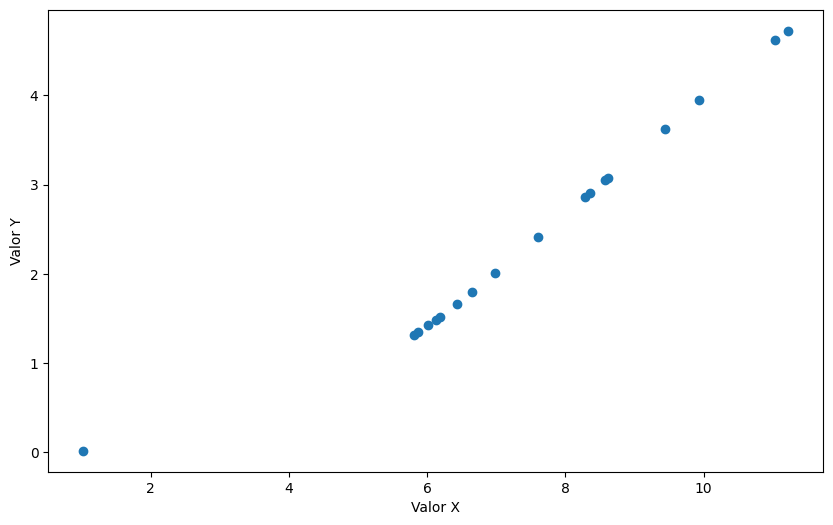

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y,'o')
ax.set_xlabel('Valor X')
ax.set_ylabel('Valor Y')
plt.show()

Buscando encontrar a melhor aproximação para a distribuição dos dados, façamos o teste com equações exponenciais e polinomiais cúbicas, que apresentam comportamento semelhante ao observado. A equação polinomial cúbica univariada é dada pela fórmula Y=a*X^3+b*X^2+c*X+d, enquanto a equação exponencial simples é dada por Y=a^X. Será criada uma função para cada equação, que traz como input o valor de X e os demais parâmetros (como argumentos)